In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(10)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1
5,152,4,114,65,0,0,21.9,0.432,37,0
6,173,2,87,0,23,0,28.9,0.773,25,0
7,276,2,100,70,52,57,40.5,0.677,25,0
8,624,0,94,70,27,115,43.5,0.347,21,0
9,443,4,117,64,27,120,33.2,0.230,24,0


In [4]:
train.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [5]:
print(train[train.glucose_concentration == 0].shape[0])

4


In [6]:
print(train[train.blood_pressure == 0].shape[0])

31


In [7]:
print(train[train.skin_fold_thickness == 0].shape[0])

187


In [8]:
print(train[train.serum_insulin == 0].shape[0])

304


In [9]:
train.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [10]:
print(test[test.serum_insulin == 0].shape[0])

70


In [11]:
def bar_chart(feature):
    diabetes = train[train['diabetes'] == 1][feature].value_counts()
    not_diabetes = train[train['diabetes'] ==0][feature].value_counts()
    df = pd.DataFrame([diabetes,not_diabetes])
    df.index = ['diabetes', 'not_diabetes']
    df.plot(kind = 'bar', stacked = True ,figsize = (10,5))
    

In [12]:
train_test_data = [ train, test]
for dataset in train_test_data:
    dataset.loc[dataset['age'] <= 16, 'age'] = 0,
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 26), 'age'] = 1,
    dataset.loc[(dataset['age'] > 26) & (dataset['age'] <= 36), 'age'] = 2,
    dataset.loc[(dataset['age'] > 36) & (dataset['age'] <= 62), 'age'] = 3,
    dataset.loc[dataset['age'] >= 62, 'age'] = 4


,age,diabetes
0,1,0.177686
1,2,0.425150
2,3,0.516129
3,4,0.210526


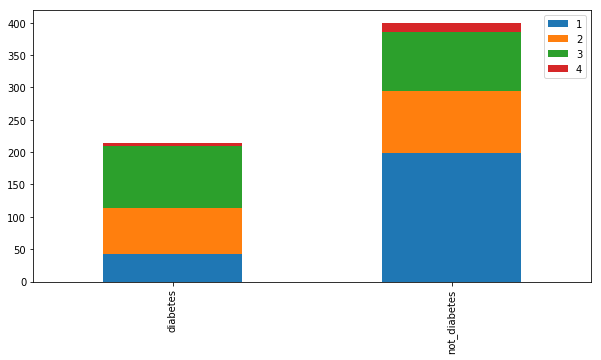

In [13]:
bar_chart('age')
train[['age', 'diabetes']].groupby(['age'], as_index = False).mean()

In [14]:
train.shape

(614, 10)

In [15]:
test.shape

(154, 9)

In [16]:
test.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,379.422078,3.811688,122.298701,70.461039,21.701299,81.571429,32.322078,0.493942,1.954545
std,215.338912,3.425719,34.769480,16.935917,16.213095,105.178271,7.386724,0.332439,0.858186
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,1.000000
25%,194.250000,1.000000,97.000000,64.000000,0.000000,0.000000,28.150000,0.248000,1.000000
50%,383.000000,3.000000,115.000000,72.000000,24.500000,52.000000,32.900000,0.411500,2.000000
75%,583.250000,6.000000,144.750000,78.000000,33.000000,129.500000,36.200000,0.654750,3.000000
max,738.000000,14.000000,199.000000,122.000000,99.000000,474.000000,67.100000,2.137000,4.000000


In [17]:
print(test[test.bmi == 0].shape[0])

1


In [18]:
train['bmi'].replace(0, np.nan, inplace=True)
test['bmi'].replace(0, np.nan, inplace=True)

In [19]:
test.isnull().sum()

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      1
diabetes pedigree        0
age                      0
dtype: int64

In [20]:
train['bmi'].fillna(train.groupby('age')['bmi'].transform("median"), inplace = True)
test['bmi'].fillna(test.groupby('age')['bmi'].transform("median"), inplace = True)


In [21]:
for dataset in train_test_data:
    dataset.loc[dataset['bmi'] <= 18.5, 'bmi'] = 0,
    dataset.loc[(dataset['bmi'] > 18.5) & (dataset['bmi'] <= 24.9), 'bmi'] = 1,
    dataset.loc[dataset['bmi'] >= 24.9, 'bmi'] = 2


,bmi,diabetes
0,0.0,0.000000
1,1.0,0.076923
2,2.0,0.389513


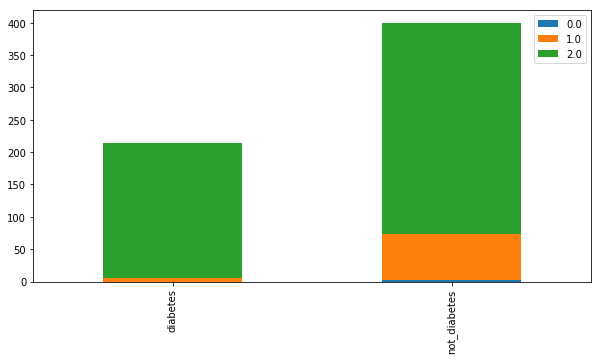

In [22]:
bar_chart('bmi')
train[['bmi', 'diabetes']].groupby(['bmi'], as_index = False).mean()

In [23]:
train.isnull().sum()

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64

In [24]:
print(test[train.serum_insulin == 0].shape[0])

81


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [25]:
train['serum_insulin'].mean()

79.35504885993485

In [26]:
train['serum_insulin'].median()

17.0

In [27]:
train['serum_insulin'].max()

846

In [28]:
train['serum_insulin'].count()

614

In [29]:
train['serum_insulin'].replace(0, np.nan, inplace=True)
test['serum_insulin'].replace(0, np.nan, inplace=True)

In [30]:
test.isnull().sum()

p_id                      0
no_times_pregnant         0
glucose_concentration     0
blood_pressure            0
skin_fold_thickness       0
serum_insulin            70
bmi                       0
diabetes pedigree         0
age                       0
dtype: int64

In [31]:
train['serum_insulin'].fillna(train.groupby('bmi')['serum_insulin'].transform("median"), inplace = True)
test['serum_insulin'].fillna(test.groupby('bmi')['serum_insulin'].transform("median"), inplace = True)


In [32]:
test.isnull().sum()

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
dtype: int64

In [33]:
train['serum_insulin'].fillna(train.groupby('age')['serum_insulin'].transform("median"), inplace = True)

In [34]:
train.isnull().sum()

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64

In [35]:
train['skin_fold_thickness'].replace(0, np.nan, inplace=True)
test['skin_fold_thickness'].replace(0, np.nan, inplace=True)

In [36]:
train['skin_fold_thickness'].fillna(train.groupby('bmi')['skin_fold_thickness'].transform("median"), inplace = True)
test['skin_fold_thickness'].fillna(test.groupby('bmi')['skin_fold_thickness'].transform("median"), inplace = True)

In [37]:
train.isnull().sum()

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64

In [38]:
train['blood_pressure'].replace(0, np.nan, inplace=True)
test['blood_pressure'].replace(0, np.nan, inplace=True)

In [39]:
train.isnull().sum()

p_id                      0
no_times_pregnant         0
glucose_concentration     0
blood_pressure           31
skin_fold_thickness       0
serum_insulin             0
bmi                       0
diabetes pedigree         0
age                       0
diabetes                  0
dtype: int64

In [40]:
train['blood_pressure'].fillna(train.groupby('age')['blood_pressure'].transform("median"), inplace = True)
test['blood_pressure'].fillna(test.groupby('age')['blood_pressure'].transform("median"), inplace = True)

In [41]:
test.isnull().sum()

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
dtype: int64

In [42]:
train['glucose_concentration'].replace(0, np.nan, inplace=True)
test['glucose_concentration'].replace(0, np.nan, inplace=True)

In [43]:
train['glucose_concentration'].fillna(train.groupby('bmi')['glucose_concentration'].transform("median"), inplace = True)
test['glucose_concentration'].fillna(test.groupby('bmi')['glucose_concentration'].transform("median"), inplace = True)

In [44]:
train.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,121.324104,72.335505,28.501629,139.762215,1.866450,0.466342,1.970684,0.348534
std,223.603024,3.358126,29.686357,12.081756,9.171156,90.345208,0.349898,0.331090,0.906270,0.476895
min,1.000000,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,1.000000,0.000000
25%,191.250000,1.000000,100.000000,64.000000,22.000000,96.750000,2.000000,0.240250,1.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,30.000000,130.000000,2.000000,0.361000,2.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,130.000000,2.000000,0.613500,3.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,2.000000,2.420000,4.000000,1.000000


In [45]:
train.head(10)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112.0,68.0,22.0,94.0,2.0,0.315,1,0
1,25,11,143.0,94.0,33.0,146.0,2.0,0.254,3,1
2,710,2,93.0,64.0,32.0,160.0,2.0,0.674,1,1
3,658,1,120.0,80.0,48.0,200.0,2.0,1.162,3,0
4,542,3,128.0,72.0,25.0,190.0,2.0,0.549,2,1
5,152,4,114.0,65.0,15.0,76.0,1.0,0.432,3,0
6,173,2,87.0,66.0,23.0,130.0,2.0,0.773,1,0
7,276,2,100.0,70.0,52.0,57.0,2.0,0.677,1,0
8,624,0,94.0,70.0,27.0,115.0,2.0,0.347,1,0
9,443,4,117.0,64.0,27.0,120.0,2.0,0.230,1,0


In [46]:
X_train= train.iloc[:, 1:9].values
y_train = train.iloc[:, -1].values

In [47]:
test.head(10)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,437,12,140.0,85.0,33.0,130.0,2.0,0.244,3
1,411,6,102.0,90.0,39.0,130.0,2.0,0.674,2
2,639,7,97.0,76.0,32.0,91.0,2.0,0.871,2
3,213,7,179.0,95.0,31.0,130.0,2.0,0.164,3
4,181,6,87.0,80.0,19.0,90.0,1.0,0.084,2
5,294,1,128.0,48.0,45.0,194.0,2.0,0.613,1
6,395,4,158.0,78.0,31.5,130.0,2.0,0.803,2
7,327,1,122.0,64.0,32.0,156.0,2.0,0.692,2
8,627,0,125.0,68.0,19.0,90.0,1.0,0.206,1
9,107,1,96.0,122.0,19.0,90.0,1.0,0.207,2


In [48]:
X_test= test.iloc[:, 1:].values

In [49]:
# fitting Logistic regression to training sets
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression( random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
# predicting the test set result 
y_pred = classifier.predict(X_test)
classifier.score(X_train, y_train)

0.7671009771986971

In [51]:
submission = pd.DataFrame({
        "p_id": test["p_id"],
        "diabetes": y_pred
    })

submission.to_csv('diabetes.csv', index=False)

In [52]:
#    SVM

from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'linear', random_state = 0)
svc_classifier.fit(X_train, y_train)

# Predicting the Test set results
# y_pred = svc_classifier.predict(X_test)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
# predicting the test set result 
y_pred = svc_classifier.predict(X_test)
svc_classifier.score(X_train, y_train)

0.760586319218241